# Assignment 4 - Unsupervised Learning and Neural Networks

## *Yuan Feng*
Netid: yf115

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedforward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

In [120]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score,roc_auc_score
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
import time
from sklearn.datasets import make_blobs
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture
#np.random.seed(0)

## 1

### [35 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.

**(a)** Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation. 

In [ ]:
def kmeans(X, k, max_steps=, convergence_threshold=):
    '''kmeans
    
        Input:
            X: matrix of input data where each row represents a sample
            k: number of means to use
            max_steps: maximum number of iterations to run the algorithm
            convergence_threshold: if the means change less than this
                                   value in an iteration, declare convergence
        Output:
            means: a matrix listing the k means
            cluster_assignment: a list of the cluster assignments for each samples
            dissimilarity: sum of squared error of the Euclidean distance from each point to the cluster mean
    '''

**(b)** Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.

**(c)** Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.

**(d)** Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (c) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own*

**ANSWER**

**(a)**

In [3]:
def kmeans(X,k,max_steps,convergence_threshold):
    
    '''kmeans
    
        Input:
            X: matrix of input data where each row represents a sample
            k: number of means to use
            max_steps: maximum number of iterations to run the algorithm
            convergence_threshold: if the means change less than this
                                   value in an iteration, declare convergence
        Output:
            means: a matrix listing the k means
            cluster_assignment: a list of the cluster assignments for each samples
            dissimilarity: sum of squared error of the Euclidean distance from each point to the cluster mean
    '''
    
    centroid = X[np.random.choice(X.shape[0],k, replace = False)]
    label = np.zeros(X.shape[0], dtype=int)
    diff = 1
    
    def labels(X):
        for i, point in enumerate(X):
            dist = np.linalg.norm(centroid - point, axis = 1)
            label[i] = np.argmin(dist)#get which current centroid is closet to this x in the loop, as its label
        return label
    
    def centroids(X):
        centroid_new = np.zeros_like(centroid)
        for i in range(centroid.shape[0]):
            centroid_new[i] = np.mean(X[np.where(label == i)], axis = 0)
        return centroid_new
    
    i = 0
    while i < max_steps:
        while convergence_threshold < diff:
            label = labels(X)
            new_centroid = centroids(X)
            diff = np.max(np.linalg.norm(new_centroid - centroid, axis = 1))
            centroid = new_centroid
        i += 1
        
    def inertia(X):
        inertia = np.zeros(X.shape[0])
        for i, point in enumerate(X):
            inertia[i] = np.linalg.norm(point - centroid[label[i]])
        return np.sum(inertia ** 2)
    
    means = centroid
    cluster_assignment = labels(X) #a list of the cluster assignments for each samples
    dissimilarity = inertia(X) #sum of squared error of the Euclidean distance from each point to the cluster mean
    
    return means,cluster_assignment, dissimilarity

**(b)**

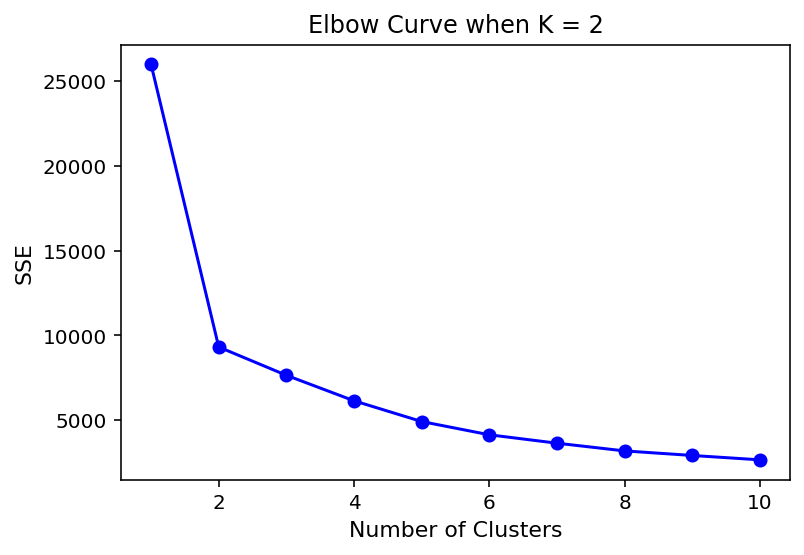

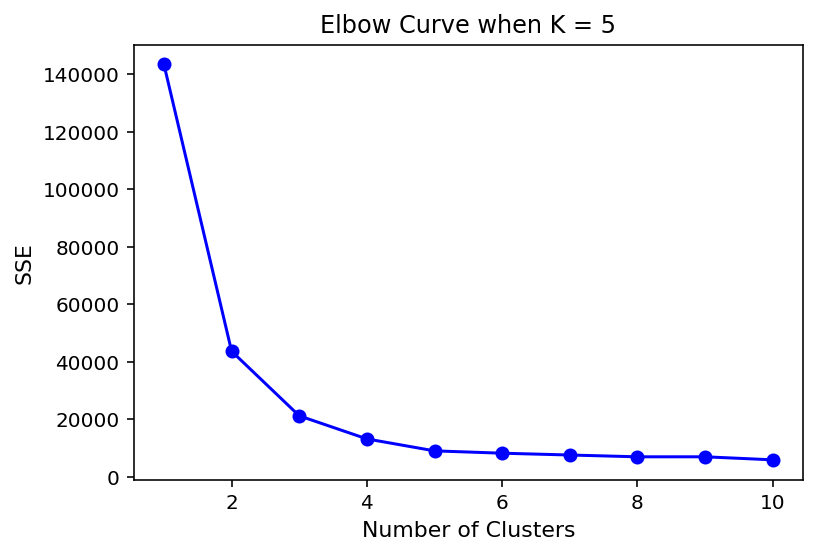

In [11]:
from sklearn.datasets.samples_generator import make_blobs
for i in [2,5]:
    X, y = make_blobs(n_samples = 5000, centers = i,random_state = 0)
    inertia = []
    for k in range(1,11):
        means,cluster_assignment,dissimilarity = kmeans(X,k,500,1e-6)
        inertia.append(dissimilarity)
    plt.plot(np.arange(1, 11), inertia, '-or',c = 'blue',label = '%d clusters'%i)
    plt.title('Elbow Curve when K = %d'%i, fontsize = 12)
    plt.xlabel('Number of Clusters', fontsize = 11)
    plt.ylabel('SSE', fontsize = 11)
    plt.show()

When the number of clusters is 2, the optimal elbow value of K is 2. Based on the first plot, this is the point where the change in slope is significanltly smaller after K = 2 and the line is almost flat.

When the number of clusters is 5, the optimal elbow value of K is 5. Similarly, the slope became small and the line is nearly flat with K bigger than 5. 

According to the two plots above, SSE increases as K increases, but the decrease in SSE could be minimal after surpassing the optimal K values and if the value of K is too large, overfitting may occur, affecting the model performance on test data.

**(c)**

(1) k-means

K-means selects the initial centroids by random, and updates the centroids to the mean of the cluster while minimizing the sum of squared distance. The number of clusters is initialized as hyperparameters. It performs best when the data is equal variance.

(2) agglomerative clustering

Agglomerative clustering starts from the bottom of the data points and creates cluster through merging data points via loss function of different linkage criteria towards a certain number of clusters of selection. It performs well with seperated clusters.


(3) Gaussian mixture models

Gaussian mixture models assumes data points follow gaussian distributions. It functions by maximizing the likelihoods of parameters and works well with data that fullfills this assumption.


(4) DBSCAN

DBSCAN takes radius and minPts and performs clustering based on the density of the data points.It performs well with non-linear data and struggles when the density is unclear. No hyperparameter on number of clusters in need before implementation.


(5) spectral clustering

Spectral clustering functions by creating a matrix of the data and applies PCA on the data points to conduct dimensionality reduction. It performs well with non-linear data as well.

**(d)**

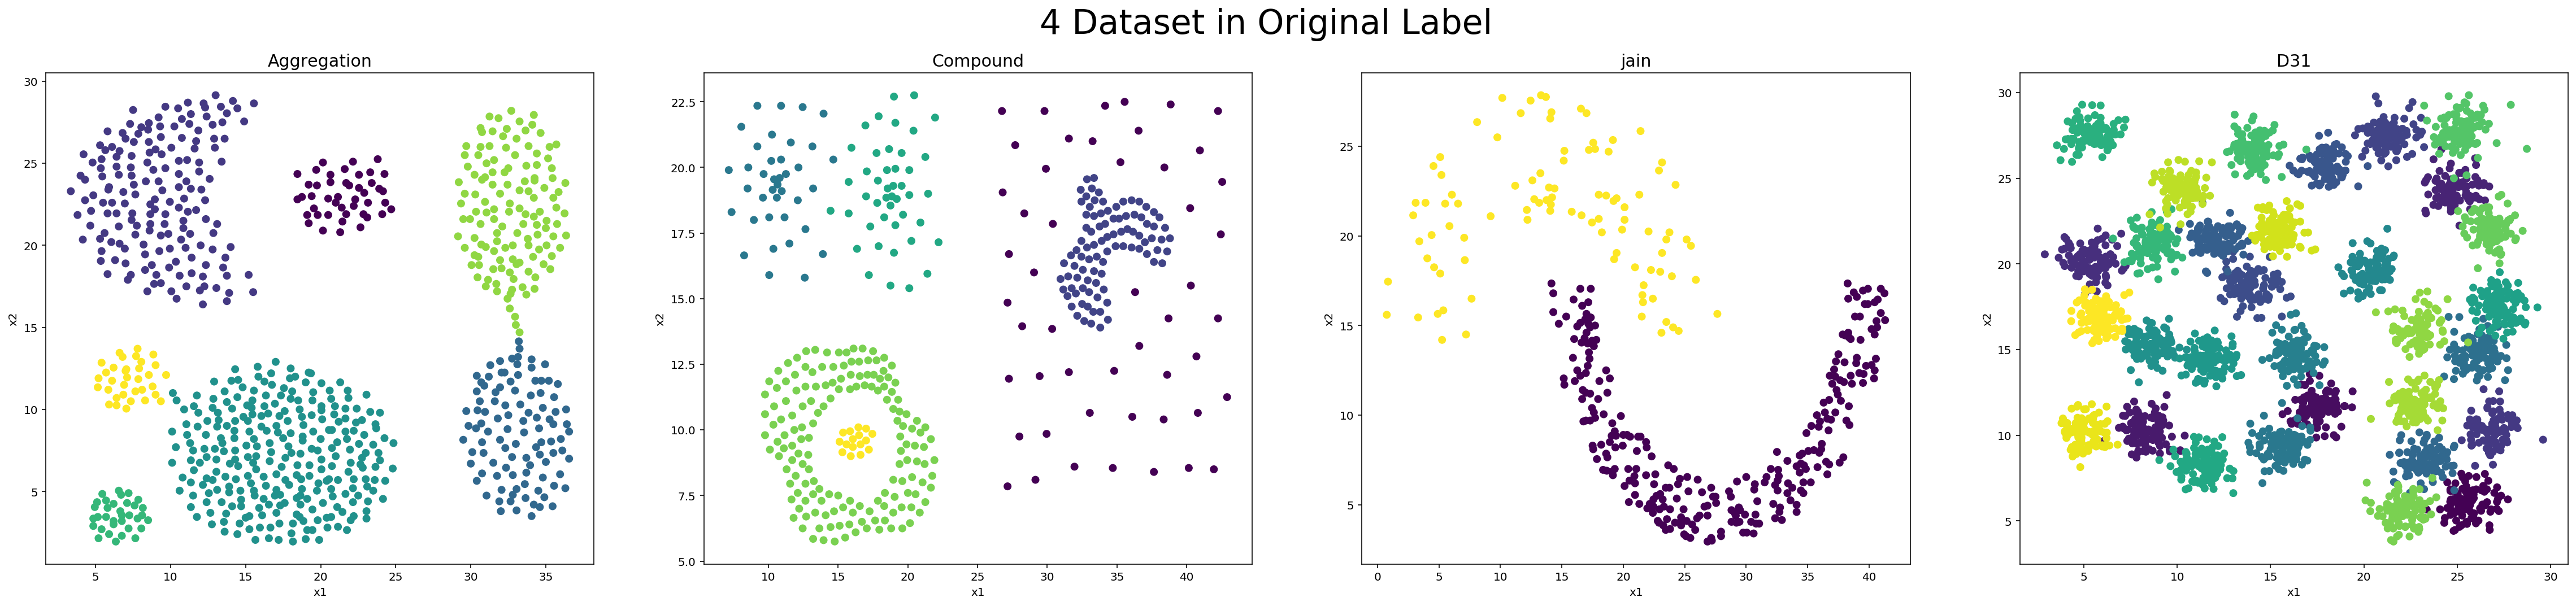

In [22]:
#loading txt files
Aggregation = np.loadtxt('Aggregation.txt')
Compound = np.loadtxt('Compound.txt')
jain = np.loadtxt('jain.txt')
D31 = np.loadtxt('D31.txt')
file_name = [Aggregation,Compound,jain,D31]
title = ['Aggregation','Compound', 'jain', 'D31']
plt.figure(figsize = (40, 8))

for j,i in enumerate(file_name):
    plt.subplot(1, 4, j+1)
    plt.scatter(i[:, 0], i[:, 1], c = i[:, 2])
    plt.xlabel('x1', fontsize = 10)
    plt.ylabel('x2', fontsize = 10)
    plt.title(title[j], fontsize = 15)
    
plt.suptitle('4 Dataset in Original Label', fontsize = 30)
plt.show()

In [31]:
def model_fitting(data, n1, n2,link,n3,cov,eps,minsample,n4):
    result = [KMeans(n_clusters = n1).fit(data).labels_,
             AgglomerativeClustering(n_clusters = n2, linkage=link).fit(data).labels_,
             GaussianMixture(n_components=n3, covariance_type=cov).fit_predict(data),
             DBSCAN(eps=eps, min_samples=minsample).fit(data).labels_,
             SpectralClustering(n_clusters=n4).fit(data).labels_]
    return result

Aggregation_label = model_fitting(Aggregation,7,7,'average',7,"full",1.5,10,7)
Compound_label = model_fitting(Compound,6,6,'ward',6,'full',1.5,4,6)
jain_label = model_fitting(jain,2,2,'complete',2,'tied',2.5,20,2)
D31_label = model_fitting(D31,31,31,'ward',31,'full',0.3,1,31)

<function matplotlib.pyplot.show(*args, **kw)>

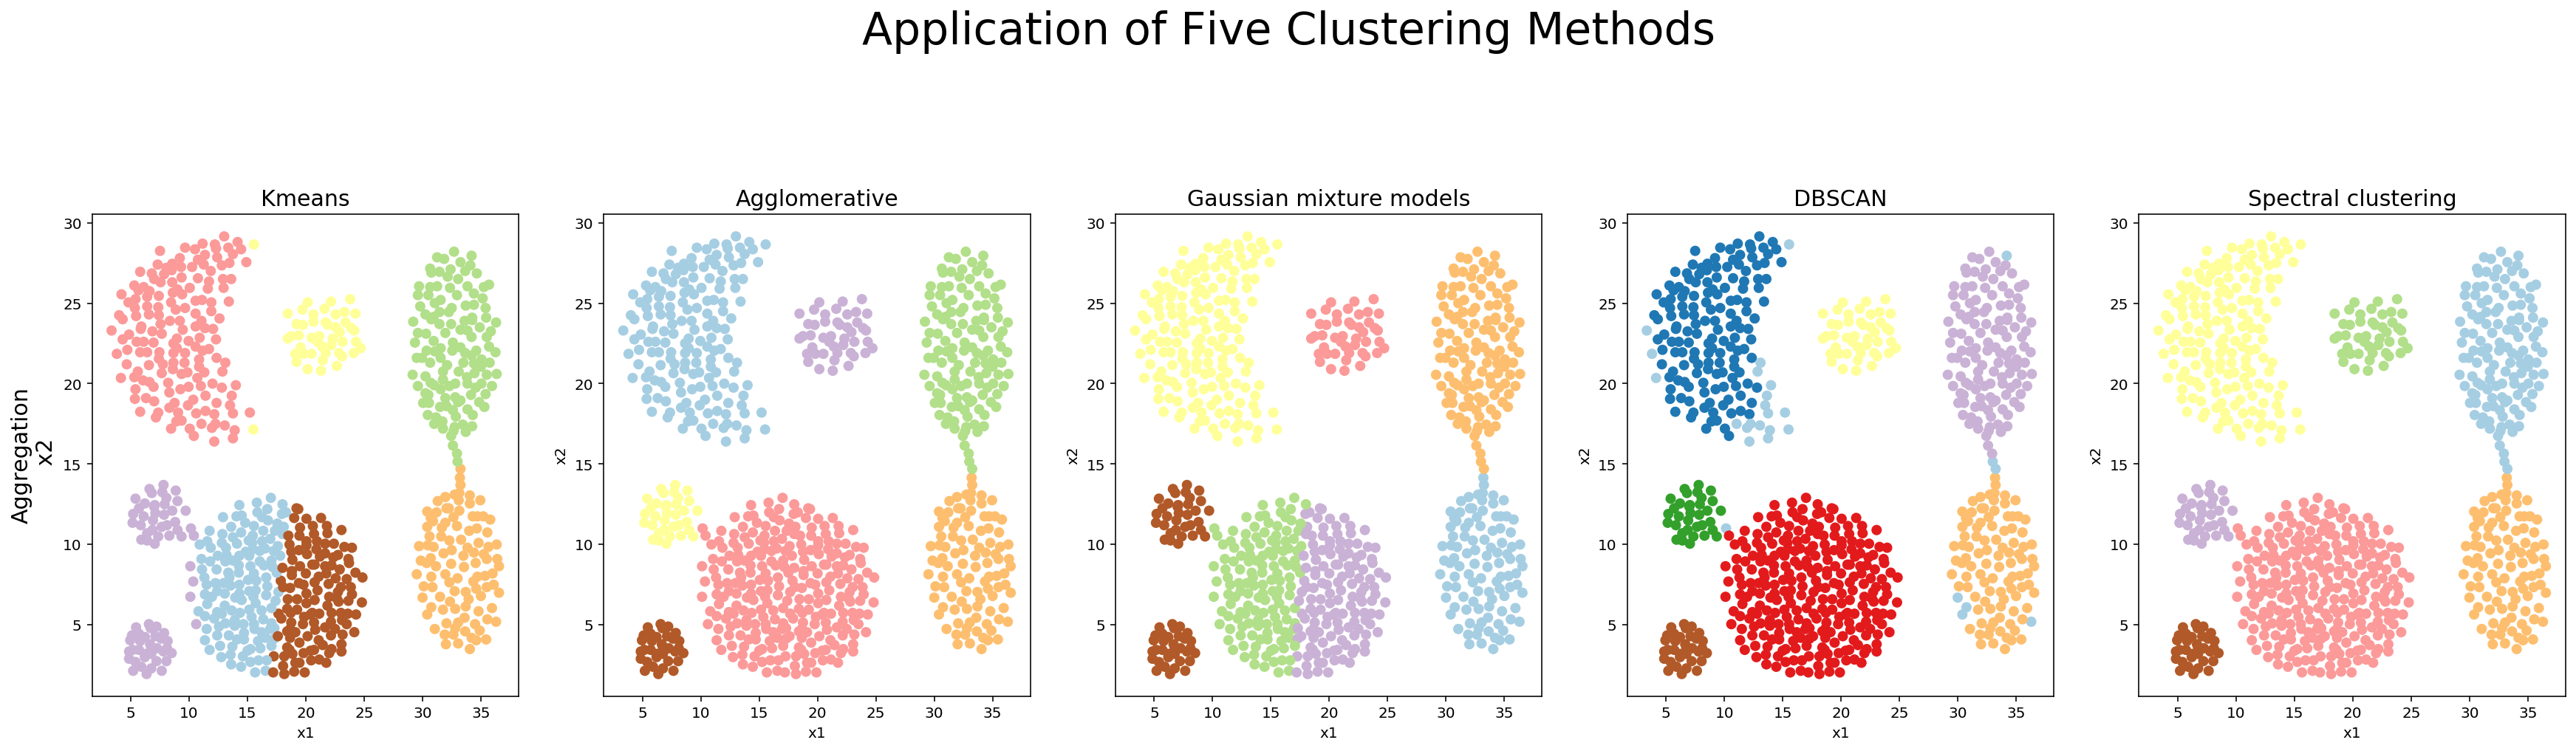

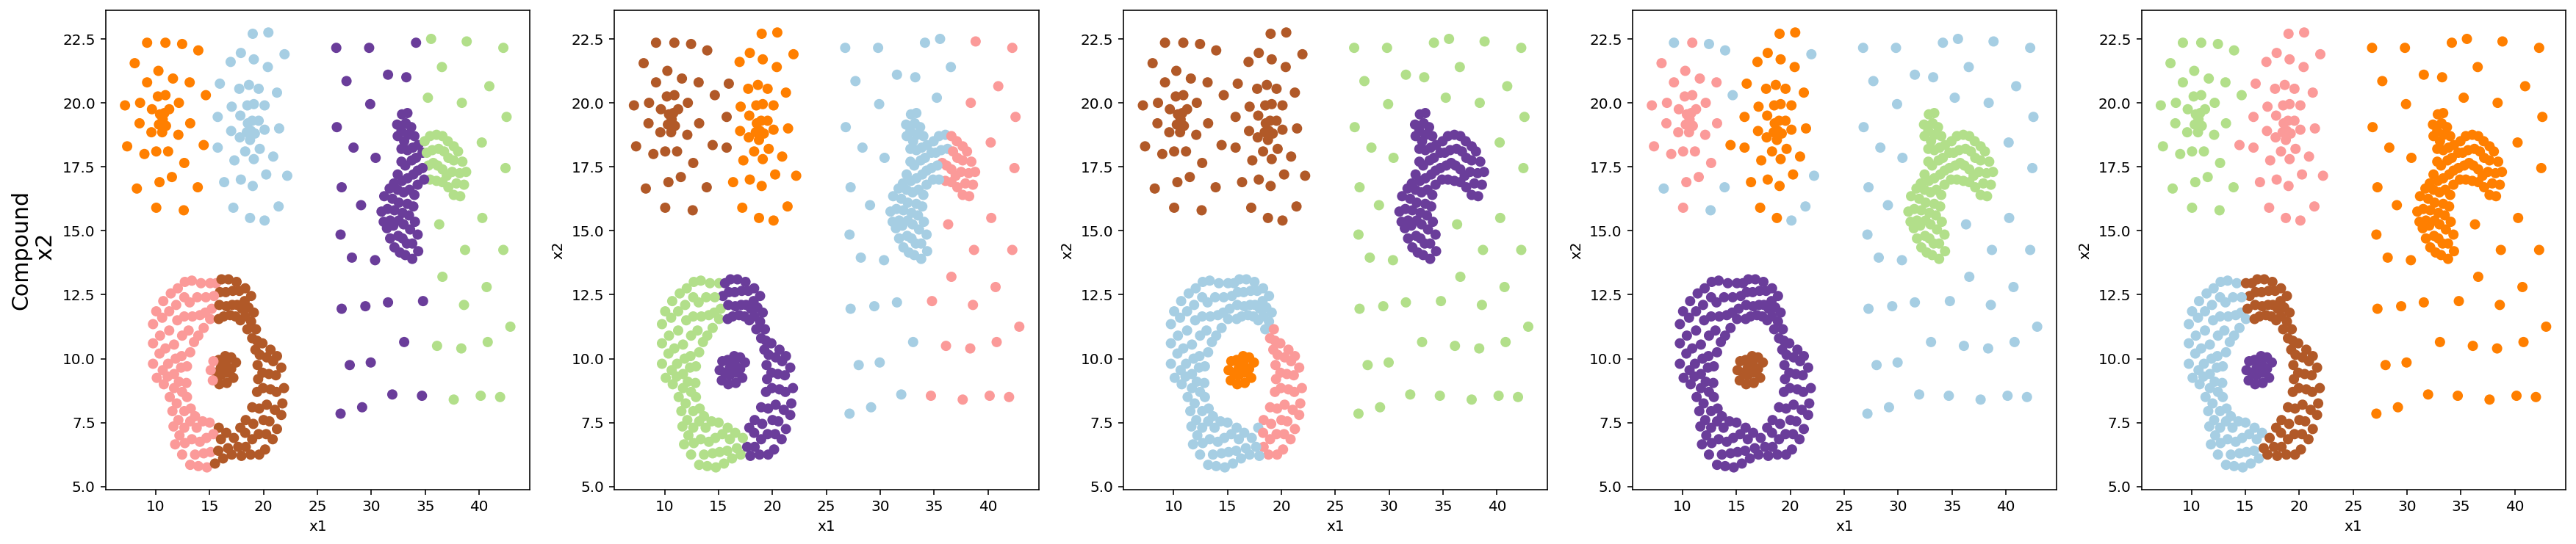

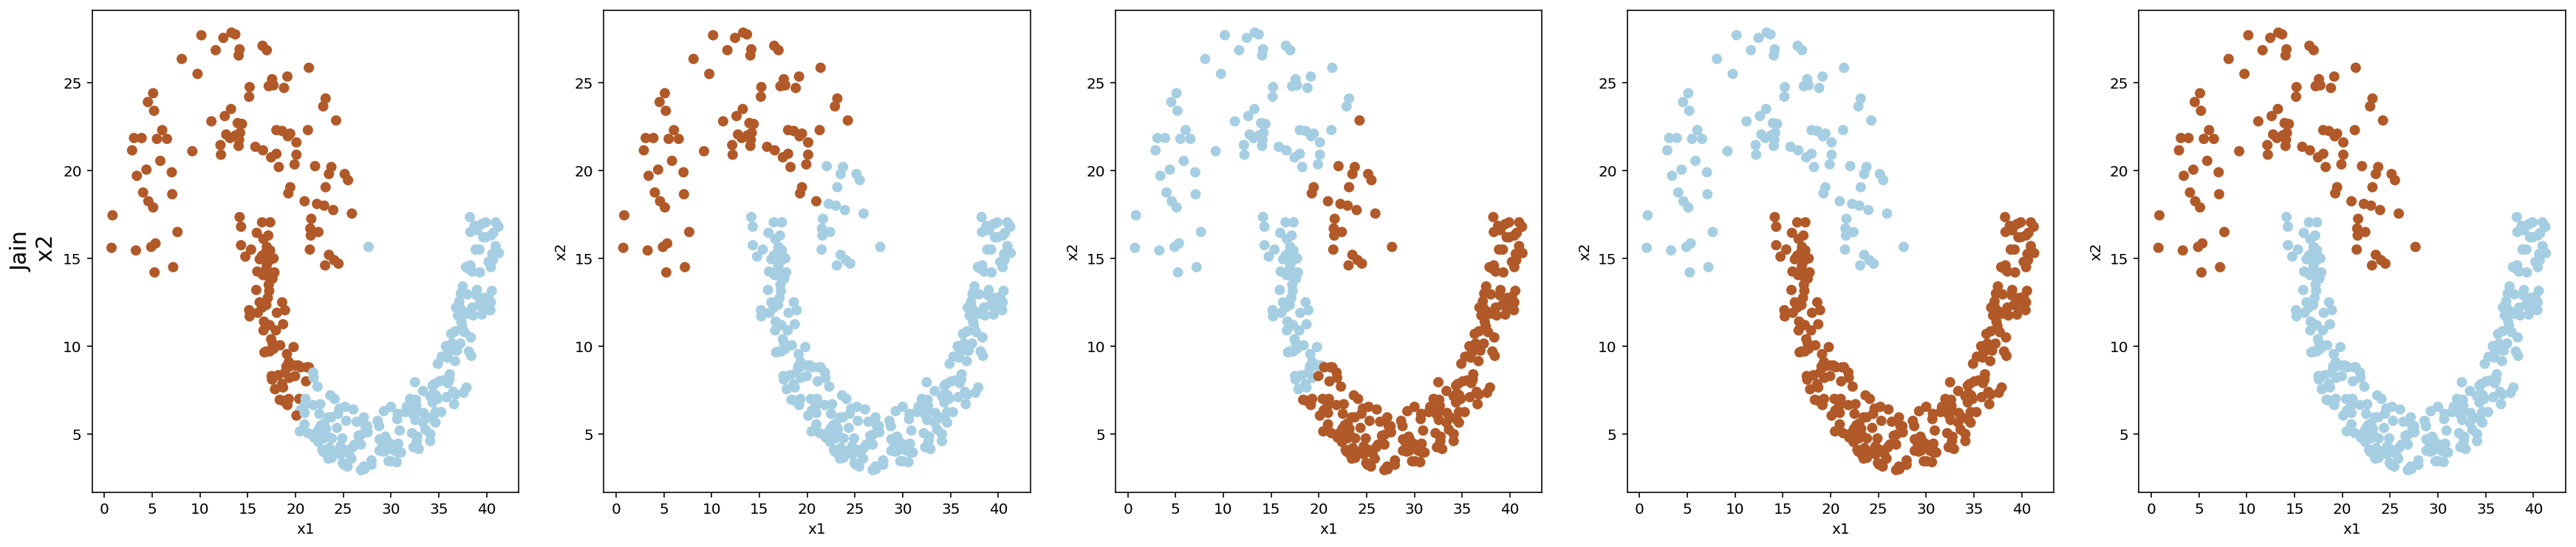

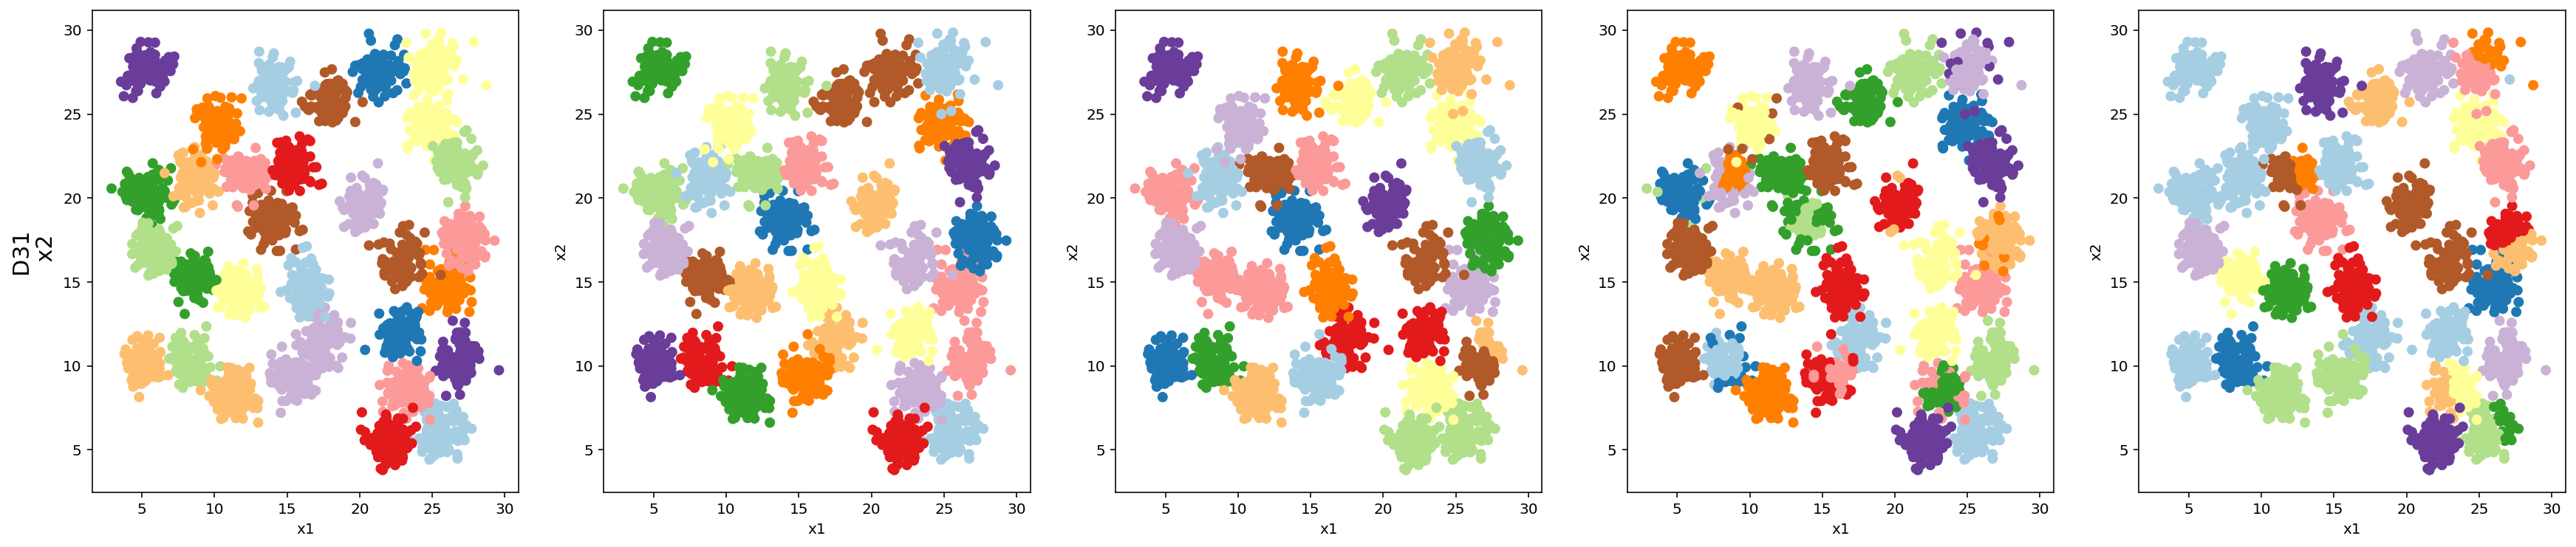

In [32]:
def plot(data,label,make_title,num):
    dataname = ['Aggregation', 'Compound', 'Jain','D31' ]
    title = ['Kmeans', 'Agglomerative', 'Gaussian mixture models', 'DBSCAN', 'Spectral clustering']
    fig = plt.figure(figsize=(30, 6))
    for j,i in enumerate(label):
        plt.subplot(1, 5, j+1)
        plt.scatter(data[:, 0], data[:, 1], c = i,cmap = 'Paired')
        plt.xlabel('x1', fontsize = 10) 
        if make_title == True:
            plt.title(title[j], fontsize = 15)
        if j  == 0:
            plt.ylabel(dataname[num] +'\n x2', fontsize = 15)
        else:
            plt.ylabel('x2', fontsize = 10)
            
    

plot(Aggregation, Aggregation_label,True,0)
plt.suptitle('Application of Five Clustering Methods', fontsize = 30,y =1.2)
plot(Compound,Compound_label,False,1)
plot(jain,jain_label,False,2)
plot(D31,D31_label,False,3)

plt.show

**Aggregation**: 

The most proper clustering methods are Agglomerative and Spectral clustering. they are good at well-seperated datasets.
The GMM and KMeans methods are not optimal for datasets with large difference of variances in clusters, and DBSCAN will be confused due to the lines between clusters.

**Compound**: 

The best method is DBSCAN because of its focus on density and this means DBSCAN is good at dealing with outliers. 
The Kmeans and GMM perform better when the data fits into the assumption of linearity, which is not the case of the Compound dataset; The Spectral clustering has trouble with outliers.

**Jain**: 

The best clustering method are DBSCAN and Spectral clustering due to the big difference in density of Jain.
The KMeans and GMM could not perform well because of its nonlinearity and Agglomerative struggles at places where data is not well-seperated.

**D31**:

Agglomerative, KMeans, GMM and Spectral clustering perform well on this dataset because it is well-seperated, linear, and has similar variance among clusters. 
DBSCAN struggles at it due to the similar densities between clusters.

## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*

**ANSWER**

**(a)**

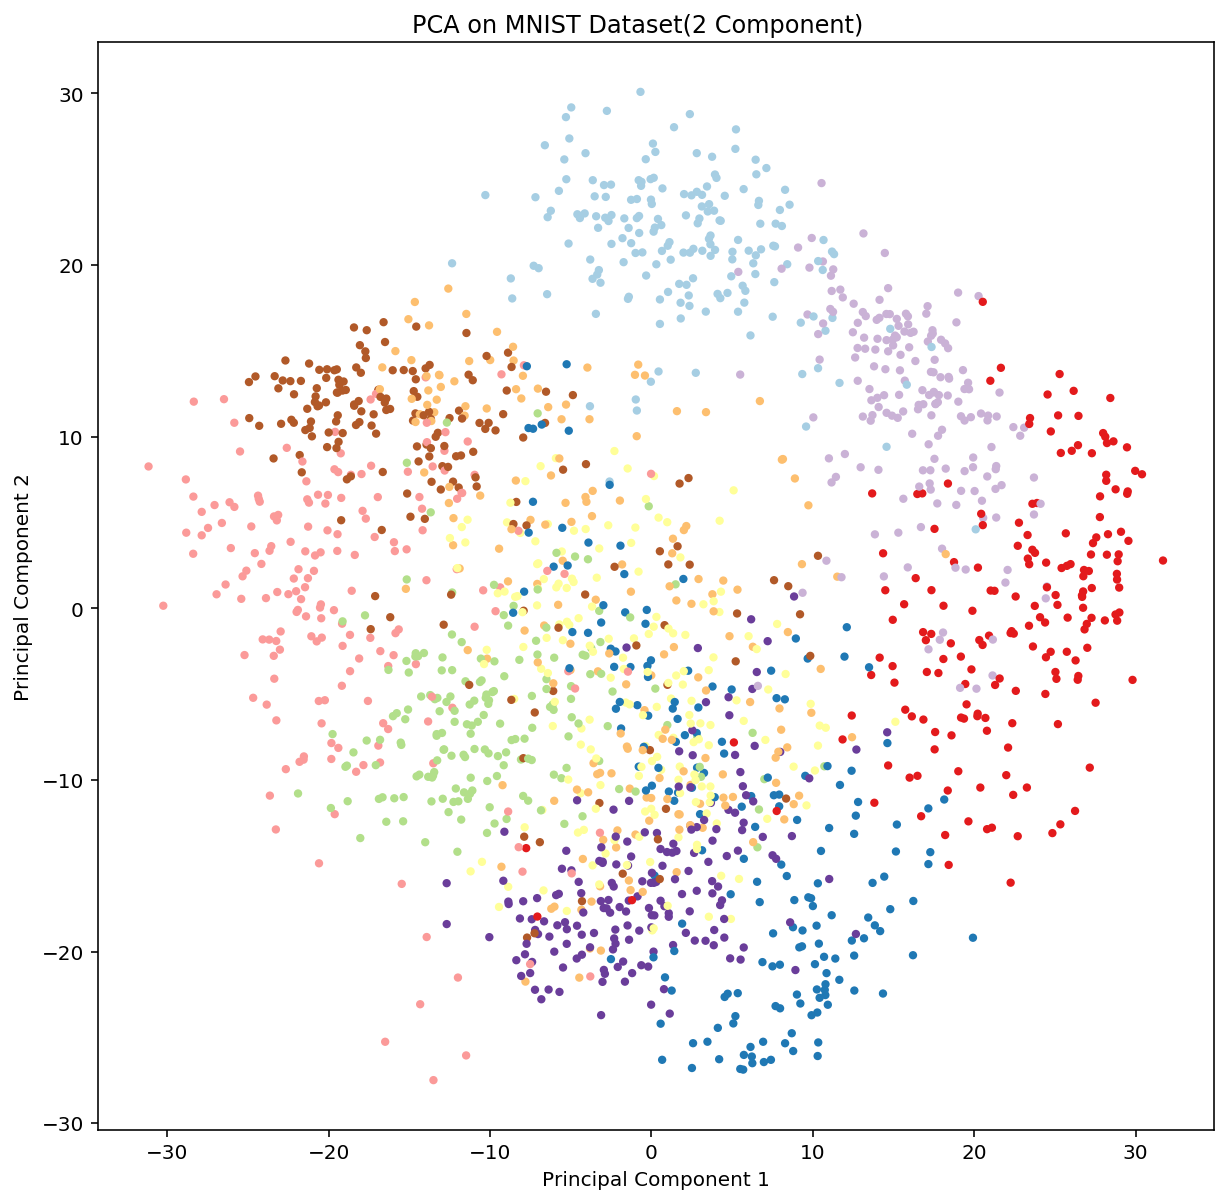

In [56]:
X2 = load_digits().data
y2 = load_digits().target
X2_pca = PCA(n_components=2).fit_transform(X2)

fig = plt.figure(figsize = (10,10))
plt.scatter(X2_pca.T[0], X2_pca.T[1], c = y2, cmap='Paired', s = 10)

plt.suptitle('PCA on MNIST Dataset(2 Component)',y=0.9)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**(b)**

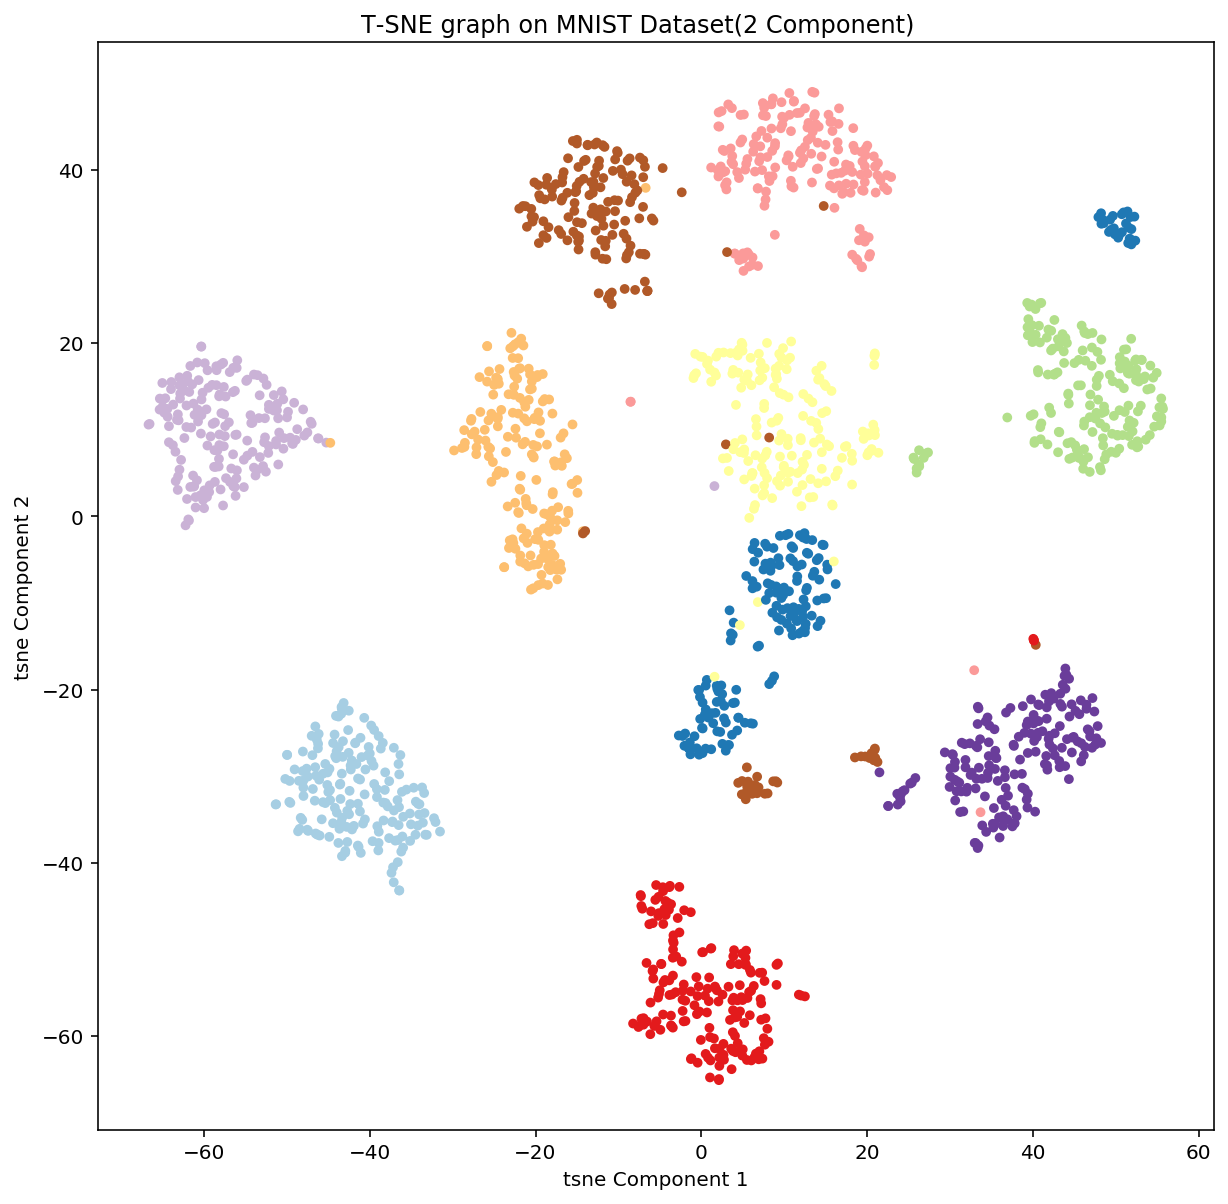

In [53]:
#init='random',
tsne = TSNE(n_components=2, perplexity=30).fit_transform(X2)
fig = plt.figure(figsize = (10,10))
plt.scatter(tsne.T[0], tsne.T[1], c = y2, cmap = 'Paired',s = 15)
plt.suptitle('T-SNE graph on MNIST Dataset(2 Component)',y=0.9)
plt.xlabel('tsne Component 1')
plt.ylabel('tsne Component 2')
plt.show()

**(c)**

T-sne provides better seperation than PCA as suggested by the plots. 

The pros of using T-sne include clearer separation due to its ability to process non-linearly. The cons of T-sne is also because its ability to process non-linearly that it takes longer time and computational power.

The pros of using PCA is less processing time and lower cost computational time. The cons is its inability to provide well-seperated clusters because it processes linearly.

## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. **You may use numpy if you wish but no other libraries.**

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

**(c)** Suggest two ways in which you neural network implementation could be improved.

**ANSWER**

**(a)**

In [173]:
class myNeuralNetwork(object):
    
    def __init__(self, n_in = 2, n_layer1 = 5, n_layer2 = 5, n_out = 1, learning_rate=0.04):
        '''__init__
        Class constructor: Initialize the parameters of the network including
        the learning rate, layer sizes, and each of the parameters
        of the model (weights, placeholders for activations, inputs, 
        deltas for gradients, and weight gradients). This method
        should also initialize the weights of your model randomly
            Input:
                n_in:          number of inputs
                n_layer1:      number of nodes in layer 1
                n_layer2:      number of nodes in layer 2
                n_out:         number of output nodes
                learning_rate: learning rate for gradient descent
            Output:
                none
        '''
        self.n_in = n_in
        self.n_layer1 = n_layer1
        self.n_layer2 = n_layer2
        self.n_out = n_out
        self.learning_rate = learning_rate
   
        self.w1 = np.random.randn(5,2)
        self.w2 = np.random.randn(5,5)
        self.w3 = np.random.randn(1,5)
        
    def forward_propagation(self, x):
        
        '''forward_propagation
        Takes a vector of your input data (one sample) and feeds
        it forward through the neural network, calculating activations and
        layer node values along the way.
            Input:
                x: a vector of data represening 1 sample [n_in x 1]
            Output:
                y_hat: a vector (or scaler of predictions) [n_out x 1]
                (typically n_out will be 1 for binary classification)
        '''
     
        self.a1 = np.dot(self.w1, x.T)
        self.z1 = self.sigmoid(self.a1)
        
        self.a2 = np.dot(self.w2, self.z1)
        self.z2 = self.sigmoid(self.a2)
        
        self.a3 = np.dot(self.w3, self.z2)
        self.yHat = self.sigmoid(self.a3)
        return self
        
    
    def compute_loss(self, X, y):
        '''compute_loss
        Computes the current loss/cost function of the neural network
        based on the weights and the data input into this function.
        To do so, it runs the X data through the network to generate
        predictions, then compares it to the target variable y using
        the cost/loss function
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                loss: a scalar measure of loss/cost
        '''
       
        self.yHat = self.forward_propagation(X)
        cost = 0.5 * sum((y - self.yHat)**2)
        return cost
    
    def backpropagate(self, x, y):
        '''backpropagate
        Backpropagate the error from one sample determining the gradients
        with respect to each of the weights in the network. The steps for
        this algorithm are:
            1. Run a forward pass of the model to get the activations 
               Corresponding to x and get the loss functionof the model 
               predictions compared to the target variable y
            2. Compute the deltas (see lecture notes) and values of the
               gradient with respect to each weight in each layer moving
               backwards through the network
    
            Input:
                x: A vector of 1 samples of data [n_in x 1]
                y: Target variable [scalar]
            Output:
                loss: a scalar measure of th loss/cost associated with x,y
                      and the current model weights
        '''
        self.da3 = (self.yHat - y) * self.sigmoid_derivative(self.yHat)
        self.dw3 = np.dot(self.da3, self.z2.T)
        self.da2 = np.dot(self.w3.T, self.da3) * self.sigmoid_derivative(self.z2)
        self.dw2 = np.dot(self.da2, self.z1.T)
        self.da1 = np.dot(self.w2.T, self.da2) * self.sigmoid_derivative(self.z1)
        self.dw1 = np.dot(self.da1, x)

        return self
    
        
    def stochastic_gradient_descent_step(self):
        '''stochastic_gradient_descent_step
        Using the gradient values computer by backpropagate, update each
        weight value of the model according to the familiar stochastic
        gradient descent update equation.
        
        Input: none
        Output: none
        '''
        self.w1 -= self.learning_rate * self.dw1
        self.w2 -= self.learning_rate * self.dw2
        self.w3 -= self.learning_rate * self.dw3
        
        return self
    
   
    def fit(self, X, y,x_va,y_va, max_epochs, learning_rate):
        '''fit
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                training_loss:   Vector of training loss values at the end of each epoch
                validation_loss: Vector of validation loss values at the end of each epoch
                                 [optional output if get_validation_loss==True]
        '''
        
            
        self.training_loss = []
        self.validation_loss = []

        
        for j in range(max_epochs): 
            
            indexes = np.random.choice(np.arange(0, len(y)), size = len(y), replace = False)
            for i in indexes:
                
                self.forward_propagation(X[i].reshape(1,-1)).backpropagate(X[i].reshape(1,-1), y[i].reshape(1,-1))
                
                self.stochastic_gradient_descent_step()

            self.training_loss.append(0.5*np.sum(np.square(self.forward_propagation(X).yHat - y))/len(y))
            self.validation_loss.append(0.5*np.sum(np.square(self.forward_propagation(x_va).yHat - y_va))/len(y_va))
        
        
        
        return self
            
    def predict_proba(self, X):
        '''predict_proba
        Compute the output of the neural network for each sample in X, with the last layer's
        sigmoid activation providing an estimate of the target output between 0 and 1
            Input:
                X: A matrix of N samples of data [N x n_in]
            Output:
                y_hat: A vector of class predictions between 0 and 1 [N x 1]
        '''
        self.forward_propagation(X)
        
        return np.squeeze(self.yHat)
        
        
        
    
    def predict(self, X, decision_thresh=0.5):
        '''predict
        Compute the output of the neural network prediction for 
        each sample in X, with the last layer's sigmoid activation 
        providing an estimate of the target output between 0 and 1, 
        then thresholding that prediction based on decision_thresh
        to produce a binary class prediction
            Input:
                X: A matrix of N samples of data [N x n_in]
                decision_threshold: threshold for the class confidence score
                                    of predict_proba for binarizing the output
            Output:
                y_hat: A vector of class predictions of either 0 or 1 [N x 1]
        '''
        self.forward_propagation(X)
        
        return np.squeeze(self.yHat)>decision_thresh
    
    
    def sigmoid(self, X):
        '''sigmoid
        Compute the sigmoid function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid function
        '''
        return 1/(1 + np.exp(-X))
    
    
    def sigmoid_derivative(self, X):
        '''sigmoid_derivative
        Compute the sigmoid derivative function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid derivative function
        '''
        return X *(1 - X)


**(b)**

In [240]:
from sklearn.datasets import make_moons

x_train, y_train = make_moons(500, noise=0.20)
x_test, y_test = make_moons(100, noise=0.20)

In [245]:
t0 = time.time()
nn = myNeuralNetwork().fit(x_train, y_train,x_test,y_test, learning_rate = 0.04, max_epochs = 2000)
t1 = time.time() 
print( t1-t0,'s = Traing time')

48.80152416229248 s = Traing time


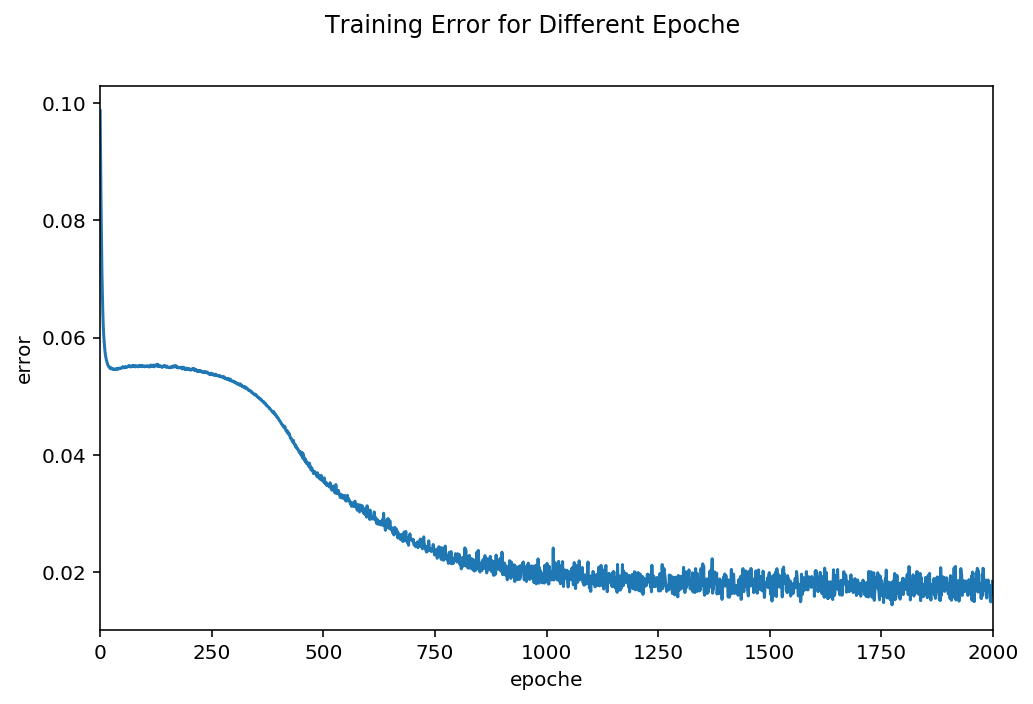

In [246]:
fig = plt.figure(figsize=(8, 5))
plt.xlabel('epoche'); plt.ylabel('error')
plt.xlim(0, 2000)
plt.plot(np.arange(2000), nn.validation_loss)
plt.suptitle('Training Error for Different Epoche')
plt.show()

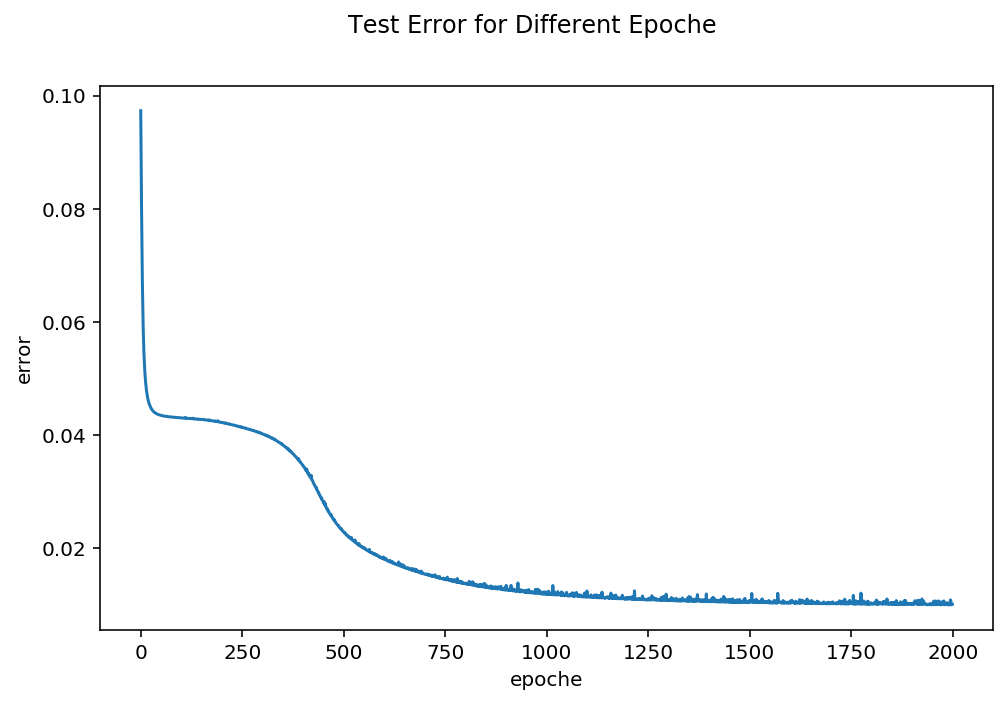

In [247]:
fig = plt.figure(figsize=(8, 5))
plt.xlabel('epoche'); plt.ylabel('error')
plt.plot(np.arange(2000), nn.training_loss)
plt.suptitle('Test Error for Different Epoche')
plt.show()

In [248]:
def get_accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [249]:
y_hat = nn.predict(x_train).reshape(len(y_train))
print("The accuracy of model after training is: ",get_accuracy(y_train, y_hat))

The accuracy of model after training is:  0.976


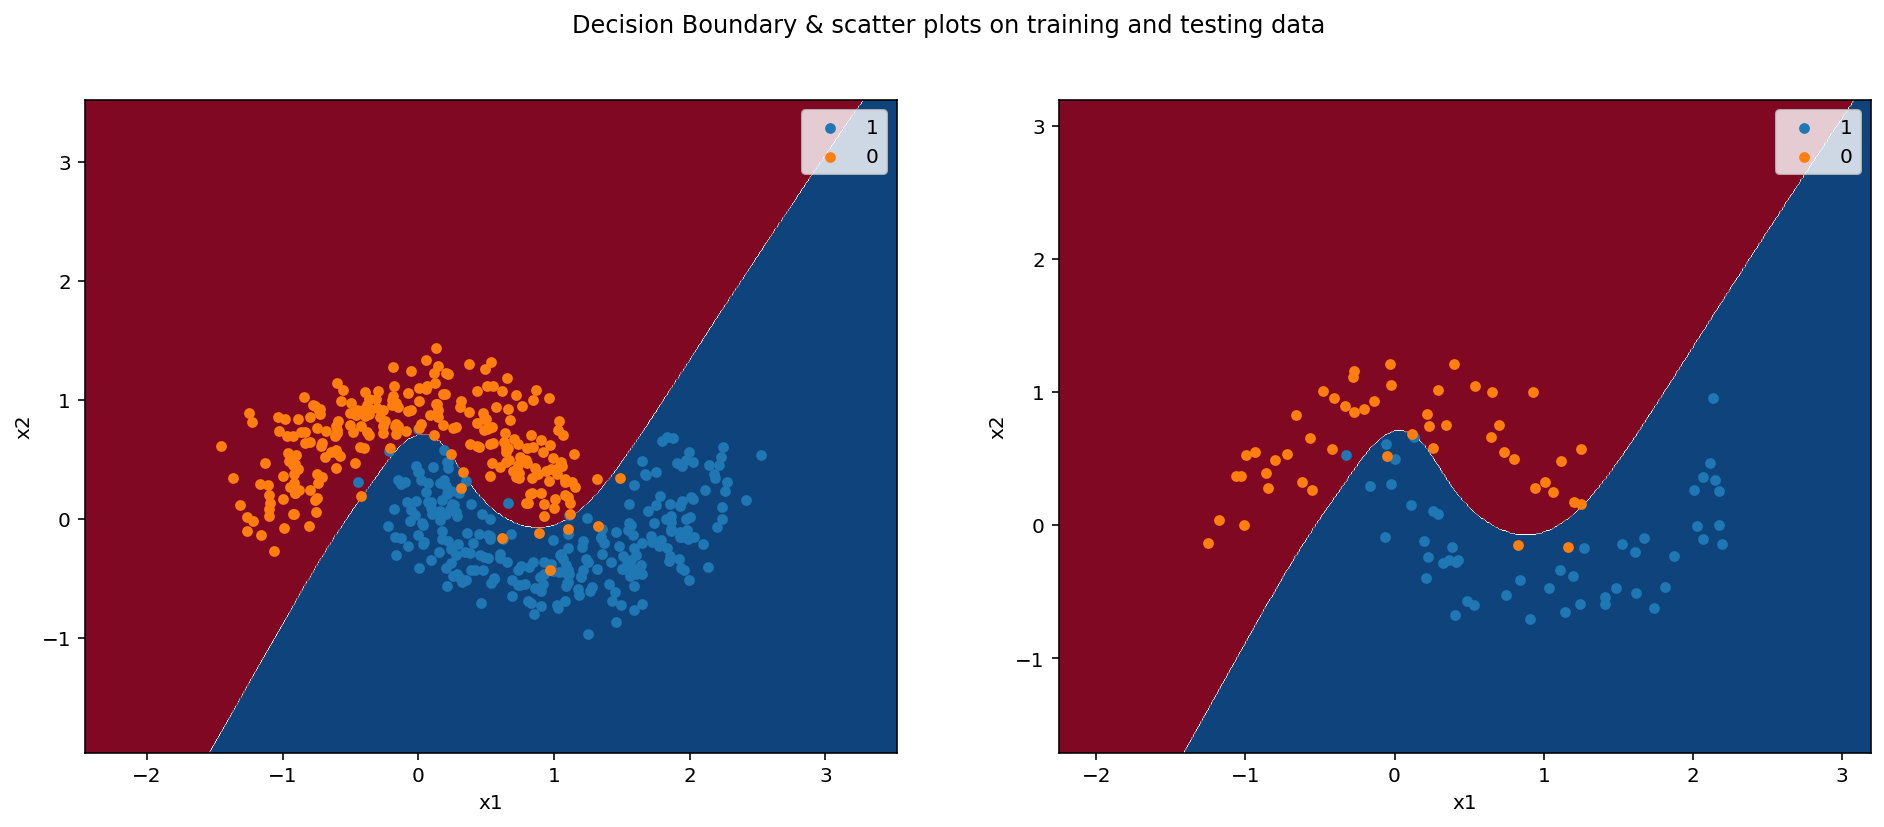

In [250]:
def plotting(X, y):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 0].max() + 1
    
    XX, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    
    pred =  nn.predict(np.array([XX.ravel(), yy.ravel()]).T).reshape(XX.shape)
    
    plt.contourf(XX, yy, pred, 15, cmap="RdBu")
    plt.scatter(X[np.where(y == 1),0], X[np.where(y == 1),1], s=20, cmap="summer", label="1", linewidth=0.9)
    plt.scatter(X[np.where(y == 0),0], X[np.where(y == 0),1], s=20, cmap="summer", label="0",  linewidth=0.9)
    
    plt.xlabel("x1", fontsize = 10)
    plt.ylabel("x2", fontsize = 10)
    plt.legend(loc="upper right")
    
    
    
fig = plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plotting(x_train, y_train)
plt.subplot(1,2,2)
plotting(x_test, y_test)
plt.suptitle('Decision Boundary & scatter plots on training and testing data')
plt.show()


In [251]:
#using scikit-learn MLPClassifier go set batch size to 1

#mlp = MLPClassifier(hidden_layer_sizes=(5,5), activation='logistic',solver='sgd',learning_rate='constant', learning_rate_init=0.04, max_iter=3000)

mlp = MLPClassifier(hidden_layer_sizes=(5,5),solver='sgd',learning_rate_init=0.04, max_iter=3000)
mlp.fit(x_train,y_train)

y_hat_mlp = mlp.predict_proba(x_test)[:,1]
fpr0, tpr0, thresholds0 = roc_curve(y_test, y_hat_mlp,pos_label=1)
auc0 = roc_auc_score(y_test, y_hat_mlp)

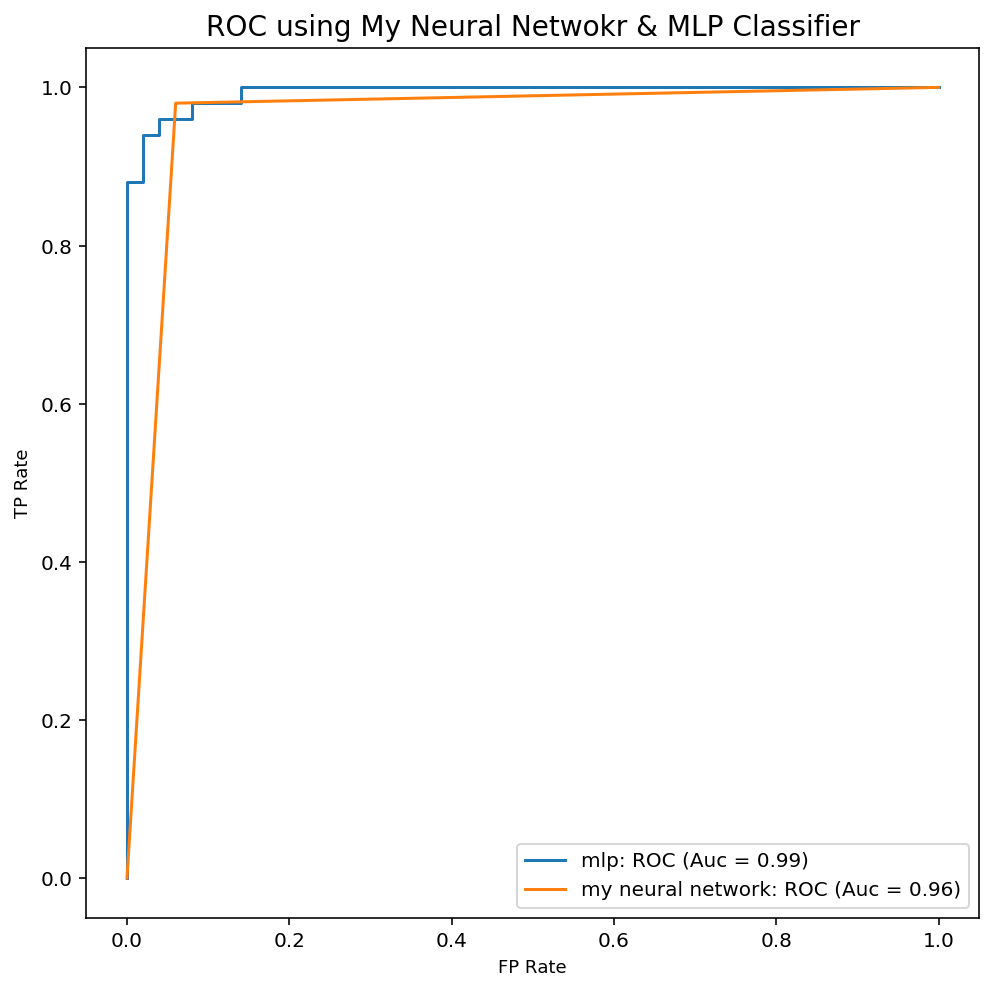

In [252]:
y_hat_test = nn.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)
auc = roc_auc_score(y_test, y_hat_test)
fig = plt.figure(figsize = (8, 8))
plt.plot(fpr0, tpr0, label="mlp: ROC (Auc = %0.2f)" % (auc0))
plt.plot(fpr, tpr, label="my neural network: ROC (Auc = %0.2f)" % (auc))
plt.title('ROC using My Neural Netwokr & MLP Classifier', fontsize = 14)
plt.xlabel('FP Rate', fontsize = 9)
plt.ylabel('TP Rate', fontsize = 9)
plt.legend()
plt.show()

**（c)**

 - Adding an additional option in the model inputs to allow choosing between stocastic gradient descent and minibatch gradient descent, if the user wish to use small batch of data ranther than single sample in SGD.
 - My model is quite slow. The traing time was as much as 48.80 seconds. Optimization of the algorithms might improve efficiency. I should try other python packages and not numpy to speed up.
